In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [4]:
df = pd.read_csv("data/metadata.csv")
df

,source,question,answer,img_id
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq
...,...,...,...,...
58844,Instrument,none,NaN,clb0lbx01dpv4086u0m8405q9
58845,Instrument,none,NaN,clb0lbx02dpwg086uenmd1sqy
58846,Instrument,none,NaN,clb0lbx07dq6s086ufm8v2qnu
58847,Instrument,none,NaN,clb0lbx1ndqps086u6is88lmw


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def norm_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z^\s]", "", text)
    text = " ".join(text.split())
    return text

# to deep learning format (remove stopwords + lemmatize)
def to_deep_learning(text):
    stop_words = set(stopwords.words("english"))
    white_list = ["what", "when", "where", "why", "any", "how"]
    stop_words.difference_update(white_list)
    
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
sort_dict = lambda x: dict(reversed(sorted(x.items(), key=lambda item: item[1])))

# Question

In [7]:
df["norm_question"] = df["question"].apply(norm_text)
df["dl_question"] = df["norm_question"].apply(to_deep_learning)

In [8]:
df

,source,question,answer,img_id,norm_question,dl_question
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq,are there any abnormalities in the image check...,any abnormality image check present
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq,are there any anatomical landmarks in the imag...,any anatomical landmark image check present
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq,are there any instruments in the image check a...,any instrument image check present
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq,have all polyps been removed,polyp removed
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq,is this finding easy to detect,finding easy detect
...,...,...,...,...,...,...
58844,Instrument,none,NaN,clb0lbx01dpv4086u0m8405q9,none,none
58845,Instrument,none,NaN,clb0lbx02dpwg086uenmd1sqy,none,none
58846,Instrument,none,NaN,clb0lbx07dq6s086ufm8v2qnu,none,none
58847,Instrument,none,NaN,clb0lbx1ndqps086u6is88lmw,none,none


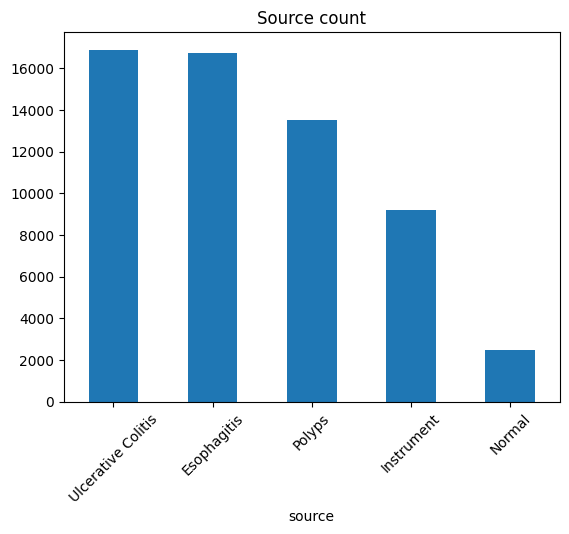

In [9]:
df["source"].value_counts().plot(kind = 'bar')
plt.title("Source count")
plt.xticks(rotation = 45)
plt.show()

ulcerative colitis = viêm loét đại tràng <br/>
esophagitis = viêm thực quản <br/>
polyp = khối u nhỏ <br/>

In [10]:
question_word_counts = dict({})

for q in df["dl_question"]:
    words = q.split()
    unique_words, counts = np.unique(words, return_counts = True)
    for word, count in zip(unique_words, counts):
        question_word_counts[word] = question_word_counts.get(word, 0) + count
    

In [11]:
question_word_counts = sort_dict(question_word_counts)

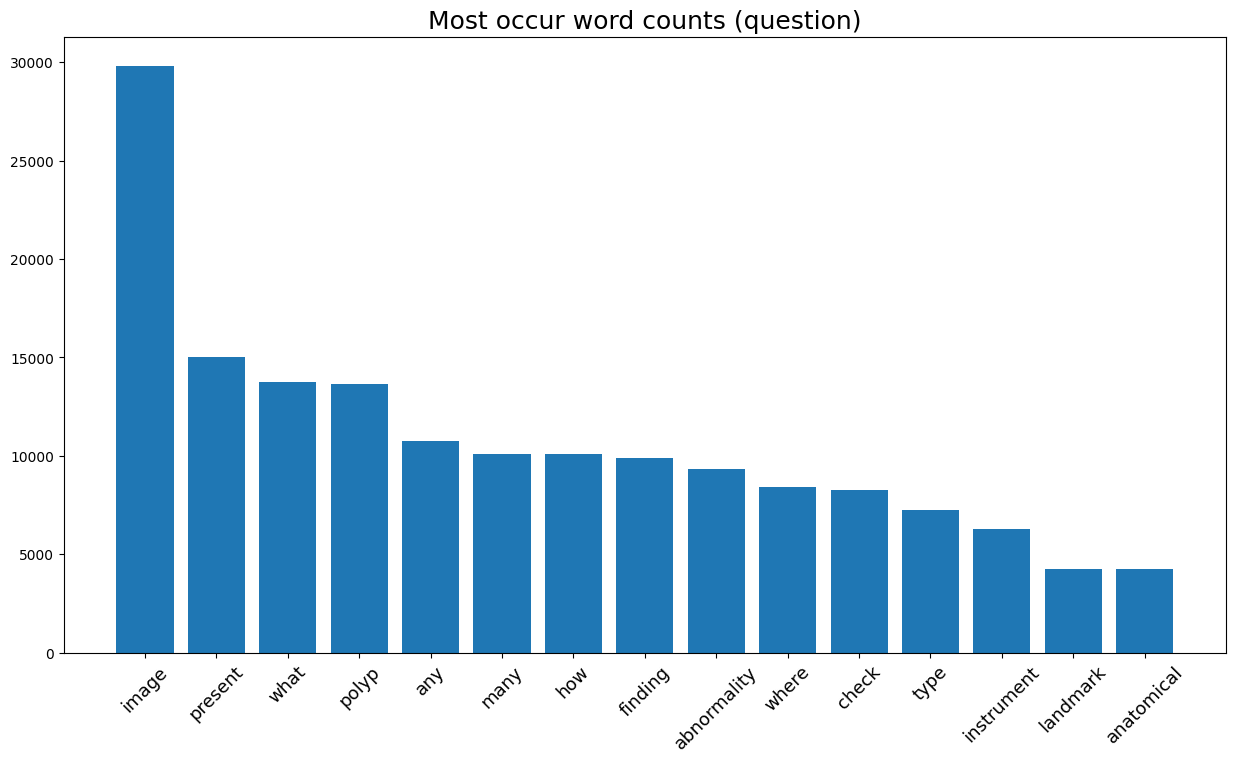

In [12]:
val = []
name = []

for i, (k, v) in enumerate(question_word_counts.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Most occur word counts (question)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

polyp = khối u <br/>
anatomical = giải phẫu

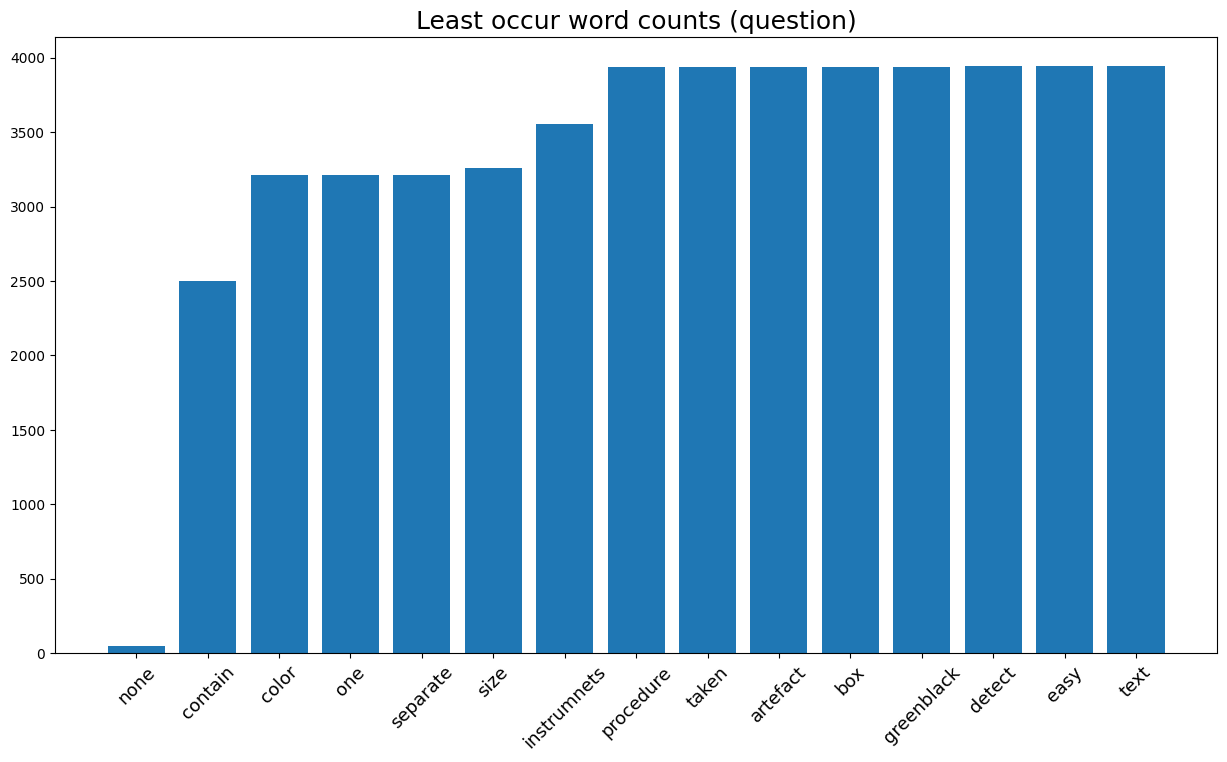

In [13]:
val = []
name = []

for i, (k, v) in enumerate(reversed(question_word_counts.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Least occur word counts (question)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

# Question (ngram = [2, 3])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer2 = CountVectorizer(
    analyzer = "word",
    ngram_range = (2, 2)
)

count_vectorizer3 = CountVectorizer(
    analyzer = "word",
    ngram_range = (3, 3)
)

count_vectorizer2.fit(df["dl_question"])
count_vectorizer3.fit(df["dl_question"])

CountVectorizer(ngram_range=(3, 3))

In [15]:
count_ngram2 = count_vectorizer2.transform(df["dl_question"])
count_ngram3 = count_vectorizer2.transform(df["dl_question"])

In [16]:
count_ngram2 = count_ngram2.toarray()
count_ngram3 = count_ngram3.toarray()

In [17]:
count_ngram2 = count_ngram2.sum(axis = 0)
count_ngram3 = count_ngram3.sum(axis = 0)

In [18]:
count_ngram2 = dict(zip(count_vectorizer2.get_feature_names_out(), count_ngram2))
count_ngram3 = dict(zip(count_vectorizer3.get_feature_names_out(), count_ngram3))

In [19]:
count_ngram2 = sort_dict(count_ngram2)
count_ngram3 = sort_dict(count_ngram3)

# Ngram = 2

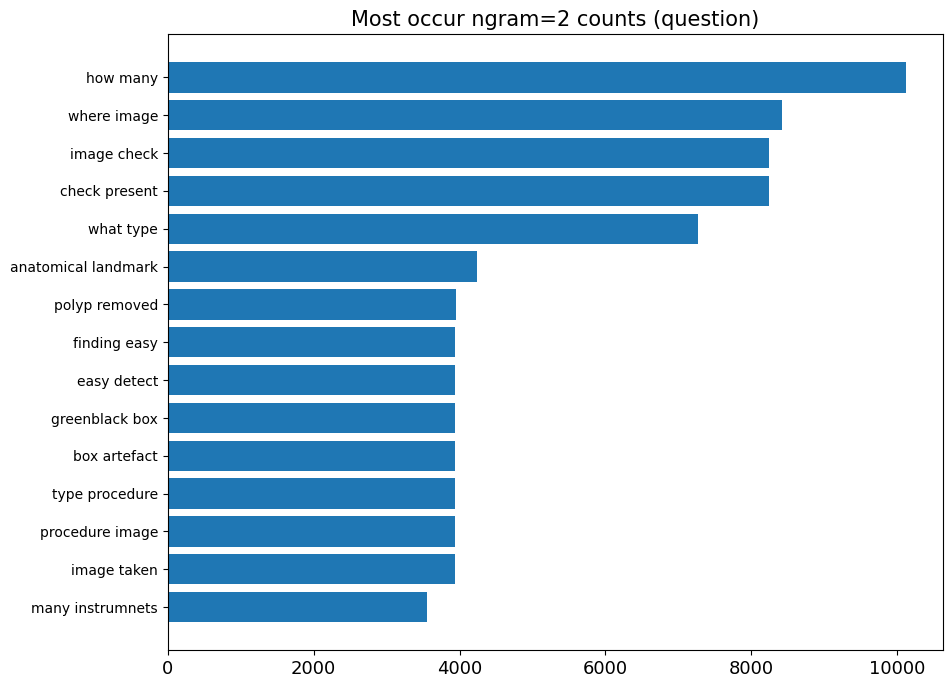

In [20]:
val = []
name = []

for i, (k, v) in enumerate(count_ngram2.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Most occur ngram=2 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

aterfact = hiện vật

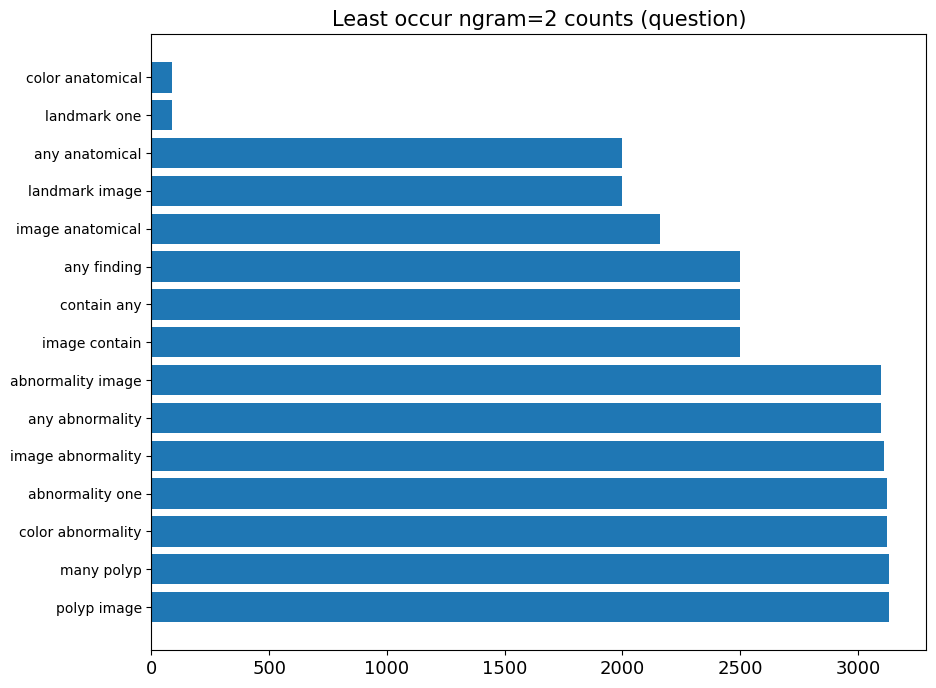

In [21]:
val = []
name = []

for i, (k, v) in enumerate(reversed(count_ngram2.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Least occur ngram=2 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

# Ngram = 3

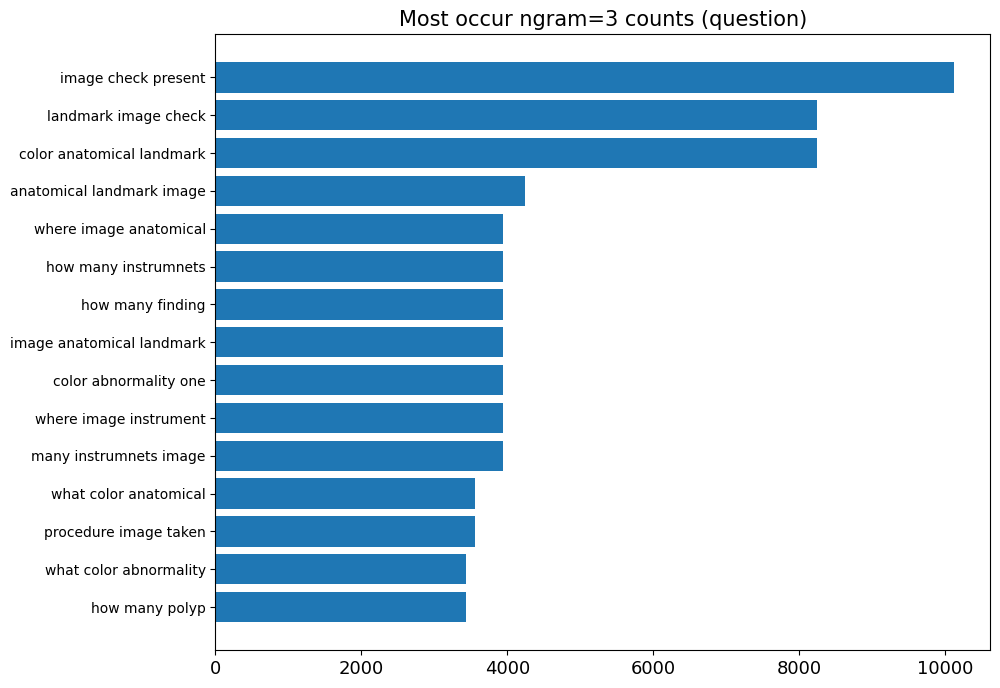

In [22]:
val = []
name = []

for i, (k, v) in enumerate(count_ngram3.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Most occur ngram=3 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

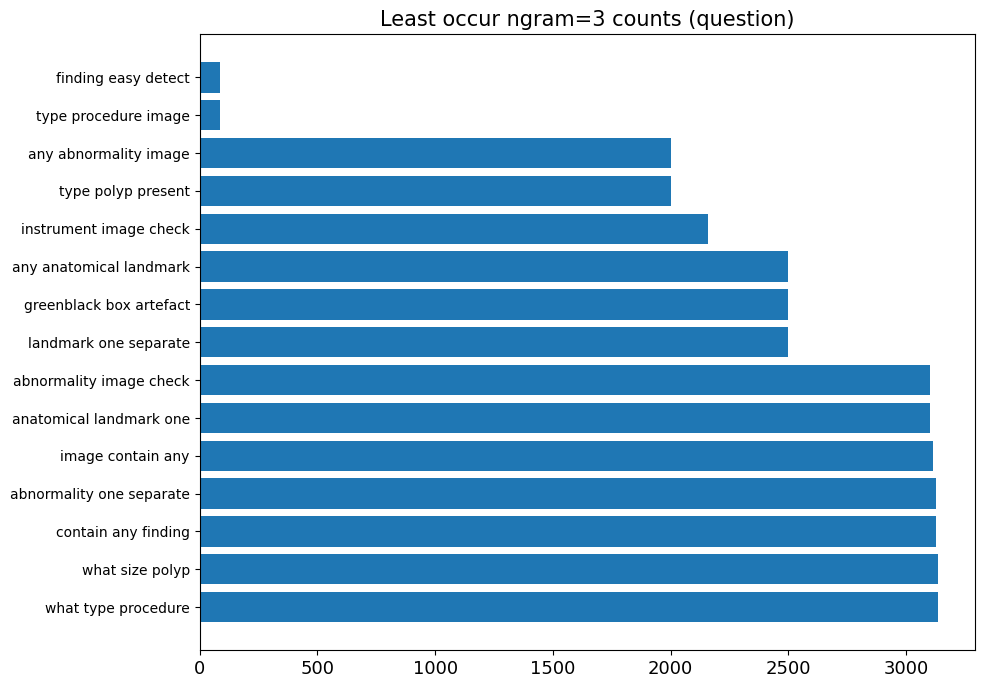

In [23]:
val = []
name = []

for i, (k, v) in enumerate(reversed(count_ngram3.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Least occur ngram=3 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

# Answer

In [24]:
df["answer"] = df["answer"].astype(str)
df["norm_answer"] = df["answer"].apply(norm_text)

In [25]:
df

,source,question,answer,img_id,norm_question,dl_question,norm_answer
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq,are there any abnormalities in the image check...,any abnormality image check present,ulcerative colitis
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq,are there any anatomical landmarks in the imag...,any anatomical landmark image check present,none
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq,are there any instruments in the image check a...,any instrument image check present,none
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq,have all polyps been removed,polyp removed,not relevant
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq,is this finding easy to detect,finding easy detect,yes
...,...,...,...,...,...,...,...
58844,Instrument,none,nan,clb0lbx01dpv4086u0m8405q9,none,none,nan
58845,Instrument,none,nan,clb0lbx02dpwg086uenmd1sqy,none,none,nan
58846,Instrument,none,nan,clb0lbx07dq6s086ufm8v2qnu,none,none,nan
58847,Instrument,none,nan,clb0lbx1ndqps086u6is88lmw,none,none,nan


In [26]:
answer_word_counts = dict({})

for q in df["norm_answer"]:
    words = q.split()
    unique_words, counts = np.unique(words, return_counts = True)
    for word, count in zip(unique_words, counts):
        answer_word_counts[word] = answer_word_counts.get(word, 0) + count

In [27]:
answer_word_counts = sort_dict(answer_word_counts)

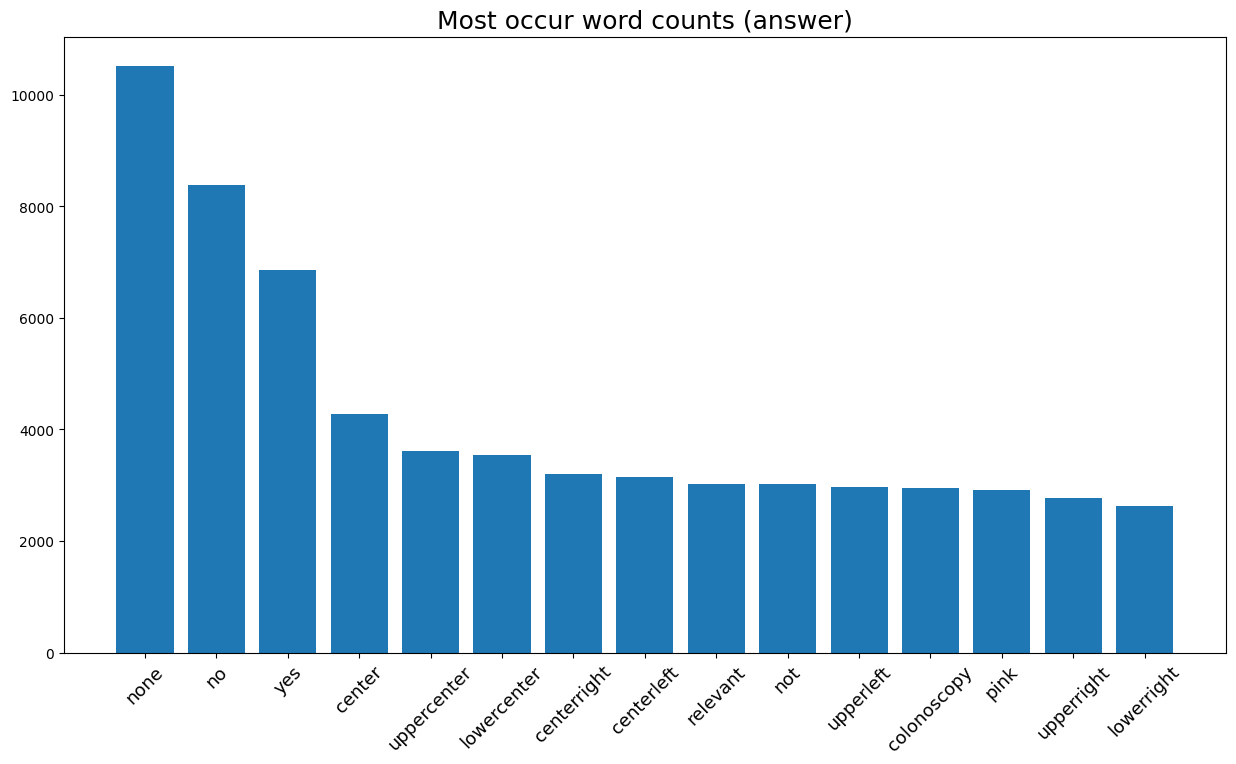

In [28]:
val = []
name = []

for i, (k, v) in enumerate(answer_word_counts.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Most occur word counts (answer)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

colonoscopy = nội soi

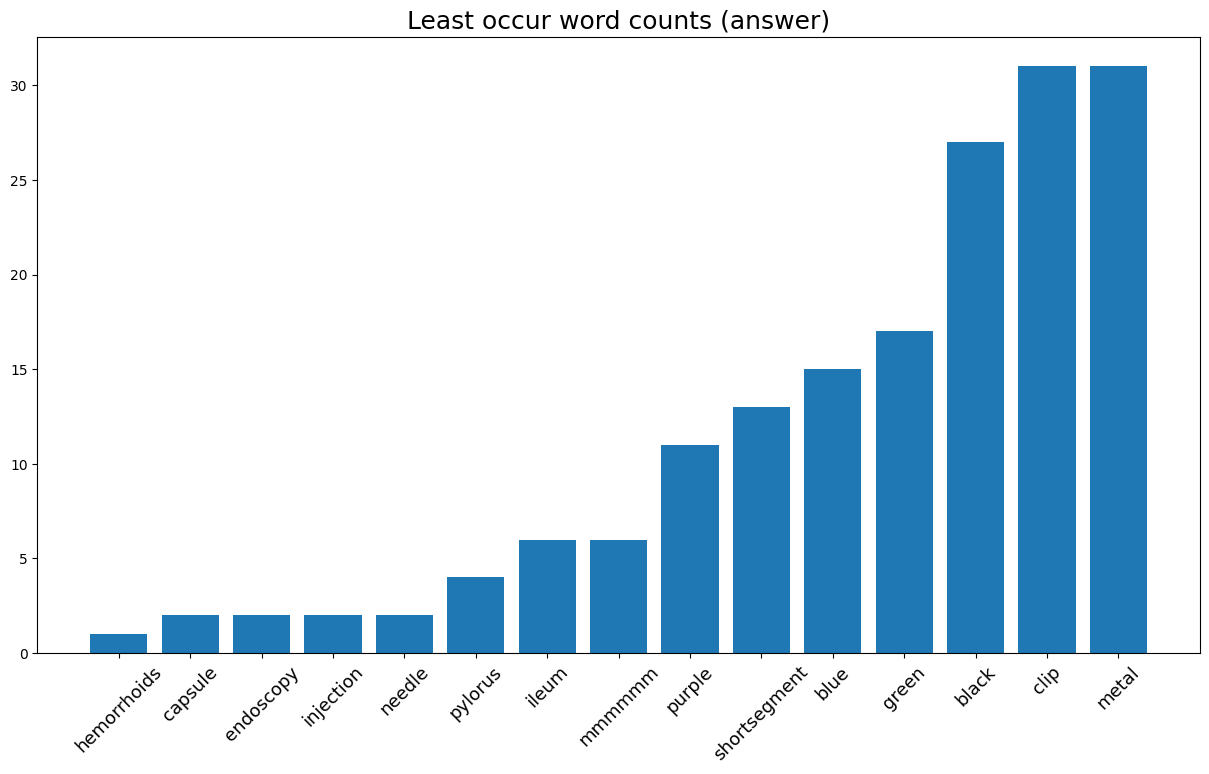

In [29]:
val = []
name = []

for i, (k, v) in enumerate(reversed(answer_word_counts.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Least occur word counts (answer)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

In [30]:
df.to_csv("data/preprocessed_metadata.csv", index = False)